In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import tools
from pylab import *
import matplotlib.animation as animation
import matplotlib as mpl
import numpy as np
import os
import standard.analysis as sa
import tools
import matplotlib.pyplot as plt
import task
import tensorflow as tf
from model import FullModel
 
mpl.rcParams['font.size'] = 30
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['image.cmap']='jet'

%matplotlib inline

In [2]:
path = 'files/cluster_parameterize_K/cluster_parameterize_K150'
x = tools.load_all_results(path, argLast=True)



['files/cluster_parameterize_K/cluster_parameterize_K150/000000', 'files/cluster_parameterize_K/cluster_parameterize_K150/000001', 'files/cluster_parameterize_K/cluster_parameterize_K150/000002', 'files/cluster_parameterize_K/cluster_parameterize_K150/000003', 'files/cluster_parameterize_K/cluster_parameterize_K150/000004', 'files/cluster_parameterize_K/cluster_parameterize_K150/000005', 'files/cluster_parameterize_K/cluster_parameterize_K150/000006', 'files/cluster_parameterize_K/cluster_parameterize_K150/000007', 'files/cluster_parameterize_K/cluster_parameterize_K150/000008', 'files/cluster_parameterize_K/cluster_parameterize_K150/000009', 'files/cluster_parameterize_K/cluster_parameterize_K150/000010', 'files/cluster_parameterize_K/cluster_parameterize_K150/000011', 'files/cluster_parameterize_K/cluster_parameterize_K150/000012', 'files/cluster_parameterize_K/cluster_parameterize_K150/000013', 'files/cluster_parameterize_K/cluster_parameterize_K150/000014', 'files/cluster_parameter

In [3]:
x.keys()

dict_keys(['w_bins', 'lin_bins', 'epoch', 'train_loss', 'train_acc', 'val_loss', 'val_acc', 'K', 'NOISE_MODEL', 'N_CLASS', 'N_KC', 'N_ORN', 'N_ORN_DUPLICATION', 'N_PN', 'ORN_NOISE_STD', 'batch_size', 'combinatorial_density', 'data_dir', 'dataset', 'direct_glo', 'distort_input', 'extra_layer', 'extra_layer_neurons', 'hallem_path', 'has_special_odors', 'initial_K', 'initial_pn2kc', 'initializer_or2orn', 'initializer_orn2pn', 'initializer_pn2kc', 'kc_bias', 'kc_dropout', 'kc_dropout_rate', 'kc_inputs', 'kc_loss', 'kc_loss_alpha', 'kc_loss_beta', 'kc_noise', 'kc_noise_std', 'kc_norm_post', 'kc_norm_pre', 'label_type', 'lr', 'mask_orn_activation_column', 'mask_orn_activation_row', 'max_epoch', 'mean_subtract_pn2kc', 'model', 'n_class_valence', 'n_combinatorial_classes', 'n_proto_valence', 'n_train', 'n_trueclass', 'n_val', 'or2orn_normalization', 'or_bias', 'oracle_scale', 'orn_dropout', 'orn_dropout_rate', 'orn_norm', 'output_bias', 'path', 'percent_generalization', 'pn_dropout', 'pn_dropo

In [4]:
x['train_acc']

array([0.75      , 0.64453125, 0.73828125, 0.75      , 0.80078125,
       0.796875  , 0.7578125 , 0.70703125, 0.8125    , 0.7734375 ,
       0.83203125, 0.85546875, 0.71484375, 0.74609375, 0.828125  ,
       0.8203125 , 0.84765625, 0.875     , 0.66015625, 0.6953125 ,
       0.79296875, 0.7734375 , 0.80859375, 0.84375   , 0.734375  ,
       0.71484375, 0.74609375, 0.74609375, 0.8671875 , 0.78515625,
       0.6953125 , 0.59765625, 0.7578125 , 0.6796875 , 0.8203125 ,
       0.765625  ], dtype=float32)

In [5]:
x['lr']

array([3.e-03, 3.e-03, 3.e-03, 3.e-03, 3.e-03, 3.e-03, 1.e-03, 1.e-03,
       1.e-03, 1.e-03, 1.e-03, 1.e-03, 3.e-04, 3.e-04, 3.e-04, 3.e-04,
       3.e-04, 3.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05, 3.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05])

In [6]:
x['N_KC']

array([ 2500,  2500,  5000,  5000, 10000, 10000,  2500,  2500,  5000,
        5000, 10000, 10000,  2500,  2500,  5000,  5000, 10000, 10000,
        2500,  2500,  5000,  5000, 10000, 10000,  2500,  2500,  5000,
        5000, 10000, 10000,  2500,  2500,  5000,  5000, 10000, 10000])

In [7]:
sparsity = np.array([y.mean() for y in x['sparsity']])
badKC = np.array([np.sum(y == 0)/y.size for y in x['sparsity']])
accuracy = x['train_acc']
histogram = x['log_hist']
linehist = x['hist']
threshold = x['thres']
lrs = x['lr']
nkcs = x['N_KC']
loss = x['train_loss']
logloss = np.log(loss)

In [8]:
x['K']

array([16.449034  , 22.547913  , 19.091011  , 28.112312  , 17.47451   ,
       32.95011   ,  7.753812  , 21.119692  , 11.311325  , 25.557709  ,
       13.063621  , 30.98422   ,  1.0035406 , 20.623568  ,  3.7442598 ,
       23.945591  ,  6.402973  , 28.737509  ,  0.3298256 , 23.349085  ,
        0.46155888, 25.535616  ,  0.72880787, 28.776966  ,  0.27445182,
       23.063366  ,  0.31473994, 28.30418   ,  0.37529248, 31.902248  ,
        0.24543601, 28.21975   ,  0.2621299 , 31.653515  ,  0.2873878 ,
       36.044     ], dtype=float32)

In [9]:
x['K'][::4]

array([16.449034  , 17.47451   , 11.311325  ,  1.0035406 ,  6.402973  ,
        0.46155888,  0.27445182,  0.37529248,  0.2621299 ], dtype=float32)

In [10]:
ind = np.logical_and(x['train_acc'] > 0.7, x['initial_K'] == 1)

In [11]:
x['K'][ind].mean()

6.1874037

In [12]:
x['K'][ind]

array([16.449034  , 19.091011  , 17.47451   ,  7.753812  , 11.311325  ,
       13.063621  ,  1.0035406 ,  3.7442598 ,  6.402973  ,  0.46155888,
        0.72880787,  0.27445182,  0.31473994,  0.37529248,  0.2621299 ,
        0.2873878 ], dtype=float32)

In [13]:
lr_labels, lrs = np.unique(x['lr'][ind], return_inverse=True)
kc_labels, nkcs = np.unique(x['N_KC'][ind], return_inverse=True)
z_acc = x['train_acc'][ind]
z_K = x['K'][ind]

In [14]:
lrs

array([5, 5, 5, 4, 4, 4, 3, 3, 3, 2, 2, 1, 1, 1, 0, 0])

In [15]:
def func(X, Y, Z, ind, vrange):
    lr_labels, lrs = np.unique(x[X][ind], return_inverse=True)
    kc_labels, nkcs = np.unique(x[Y][ind], return_inverse=True)
    z = x[Z][ind]

    im_acc = np.zeros((len(lr_labels), len(kc_labels)))
    for i, acc in enumerate(z):
            im_acc[lrs[i], nkcs[i]] = z[i] 
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    im = plt.imshow(im_acc, vmin=vrange[0],vmax=vrange[1])
    ax = plt.gca()
    for i in range(im_acc.shape[0]):
        for j in range(im_acc.shape[1]):
            c = im_acc[i,j]
            ax.text(j, i, str(np.round(c,2)), va='center', ha='center', fontsize=15)
    divider = make_axes_locatable(ax)
    plt.xticks(np.arange(len(kc_labels)),kc_labels, fontsize=15)
    plt.yticks(np.arange(len(lr_labels)),lr_labels,fontsize=15)
    plt.ylim([-.5,lr_labels.shape[0]-.5])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=15)
        

In [16]:
def g(ind):
    f, axs = plt.subplots(1,2,figsize=(8,8))
    plt.sca(axs[0])
    func('lr', 'N_KC', 'train_acc', ind, vrange=[.3, 1])
    plt.title('accuracy', fontsize=15)
    plt.sca(axs[1])
    func('lr', 'N_KC', 'K', ind, vrange=[0, 15])
    plt.title('K', fontsize=15)

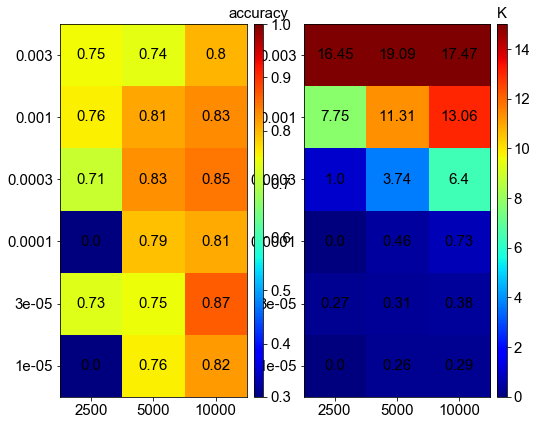

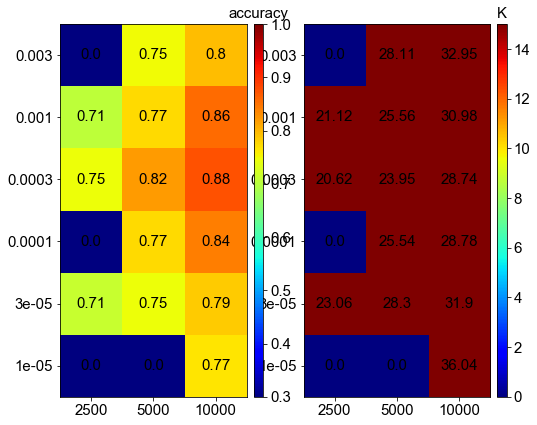

In [17]:
ind_hi = np.logical_and(x['train_acc'] > 0.7, x['initial_K'] > 1)
ind_lo = np.logical_and(x['train_acc'] > 0.7, x['initial_K'] == 1)

g(ind_lo)
g(ind_hi)

In [18]:
log = tools.load_all_results(path, argLast=False)

['files/cluster_parameterize_K/cluster_parameterize_K150/000000', 'files/cluster_parameterize_K/cluster_parameterize_K150/000001', 'files/cluster_parameterize_K/cluster_parameterize_K150/000002', 'files/cluster_parameterize_K/cluster_parameterize_K150/000003', 'files/cluster_parameterize_K/cluster_parameterize_K150/000004', 'files/cluster_parameterize_K/cluster_parameterize_K150/000005', 'files/cluster_parameterize_K/cluster_parameterize_K150/000006', 'files/cluster_parameterize_K/cluster_parameterize_K150/000007', 'files/cluster_parameterize_K/cluster_parameterize_K150/000008', 'files/cluster_parameterize_K/cluster_parameterize_K150/000009', 'files/cluster_parameterize_K/cluster_parameterize_K150/000010', 'files/cluster_parameterize_K/cluster_parameterize_K150/000011', 'files/cluster_parameterize_K/cluster_parameterize_K150/000012', 'files/cluster_parameterize_K/cluster_parameterize_K150/000013', 'files/cluster_parameterize_K/cluster_parameterize_K150/000014', 'files/cluster_parameter

/Users/pwang/Desktop/PYCHARM_GITHUB_PROJECTS/olfaction_evolution/tools.py:224: RuntimeWarning: divide by zero encountered in log
  res['train_logloss'] = np.log(res['train_loss'])


In [19]:
ind = np.logical_and(log['initial_K'] > 1, x['train_acc'] > .8)

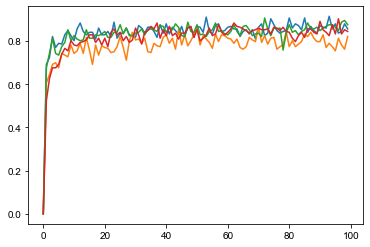

In [20]:
plt.plot(log['train_acc'][ind].T)

In [21]:
x['K'][ind].mean()

28.111073